# Customer Segmentation

### In this lesson 
### ▪ We will add three data frames to a SQLite database
### ▪ We will import tables from the database and combine them into a single data frame
### ▪ We will see how to create an RFM table
### ▪ By clustering the customer base, we will understand the customer's purchasing habits

<img src=https://worldef.net/wp-content/uploads/2023/09/turkiyede-her-2-kisiden-biri-online-alisverisi-tercih-ediyor.jpg width='400'>

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",181)
#pd.set_option("display.max_rows",None)

In [2]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [4]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,NaN,...,5.0,NaN,NaN,Aluminum,NaN,NaN,NaN,PF04829,3.0,NaN
4193,3736,Michael,Kiernan,NaN,1463418049,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,Large,NaN,NaN,NaN,NaN,PF03816,3.0,NaN


In [5]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
2183,1816,John,Falcetano,NaN,1448261287,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
2074,1735,tina,wang,Company161,1446002433,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,Regular/Large,Coated,NaN,NaN,NaN,PF41091,0.0,NaN
589,499,SYED,BILGRAMI,NaN,1417974982,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF01443,0.0,NaN
3281,2820,Jeannie A,Scarlett,NaN,1457969234,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,"6"" x 80'",Rayon/Polyester,NaN,NaN,NaN,PF00044,0.0,NaN
3128,2681,Steve,Milovich,NaN,1456867548,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RS32,0.0,NaN


In [6]:
# We delete columns with more than 85% NaN
nan_percentages = df.isna().mean() * 100

columns_to_drop = nan_percentages[nan_percentages > 85].index

df = df.drop(columns=columns_to_drop)

In [7]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,...,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.size,Products.material,Products.family_id,Products.saved_status
0,797,Christy,Dill,Company0,1426018724,NaN,1437764306,0.0,3758,797,...,0.0,24.80,7.50,30.40,NaN,NaN,NaN,NaN,PF61071,0.0
1,3,John,Smith,Company1,1386089139,NaN,1437764354,0.0,23,3,...,0.0,8.00,7.00,1.50,NaN,NaN,NaN,NaN,PF02132,NaN
2,3,John,Smith,Company1,1386089139,NaN,1437764354,0.0,9531,3,...,NaN,13.23,10.04,10.24,NaN,NaN,2 x Extra large,Nitrile,PF00342,0.0
3,4,James,Anderson,NaN,1386780263,NaN,1437762646,0.0,29,4,...,NaN,10.60,7.80,18.50,NaN,NaN,NaN,NaN,PF04970,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,0.0,30,5,...,NaN,8.50,2.75,12.00,NaN,NaN,NaN,NaN,PF03045,NaN


In [8]:
df.shape

(4194, 112)


## Preparations for SQLite

In [9]:
df.isnull().sum()

Customers.id                 0
Customers.fname              0
Customers.lname              0
Customers.company         3467
Customers.create_date        0
                          ... 
Products.handling_time    3196
Products.size             2751
Products.material         3392
Products.family_id         325
Products.saved_status      264
Length: 112, dtype: int64

In [10]:
df['Products.saved_status'].value_counts()

Products.saved_status
0.0    2782
3.0    1148
Name: count, dtype: int64

In [11]:
customers=df[['Customers.customer_type','Customers.last_modified']]

In [12]:
orders=df[['Orders.shipping_carrier','Orders.coupon_amount','Orders.total','Orders.payment_type',
           'Orders.payment_status','Orders.customer_type','Order_Items.price']]

In [13]:
products=df[['Products.status','Products.price','Products.sale_price','Products.flags','Products.left_flag',
             'Products.shopping_flags','Products.amazon_asin','Products.google_shopping_cat',
            'Products.multiple','Products.rx','Products.upc','Products.override_markup',
            'Products.hygienic','Products.material',]]

In [14]:
customers

,Customers.customer_type,Customers.last_modified
0,0.0,1437764306
1,0.0,1437764354
2,0.0,1437764354
3,0.0,1437762646
4,0.0,1437764316
...,...,...
4189,0.0,1463408698
4190,NaN,1463412756
4191,NaN,1463413245
4192,NaN,1463416687


In [15]:
orders

,Orders.shipping_carrier,Orders.coupon_amount,Orders.total,Orders.payment_type,Orders.payment_status,Orders.customer_type,Order_Items.price
0,fedex,2.86,64.29,authorize.net,3.0,0.0,57.20
1,fedex,NaN,29.99,authorize.net,3.0,0.0,5.00
2,manual,NaN,78.73,authorize.net,3.0,0.0,68.78
3,NaN,NaN,29.55,NaN,3.0,0.0,19.56
4,fedex,NaN,46.00,NaN,3.0,0.0,36.05
...,...,...,...,...,...,...,...
4189,NaN,NaN,16.06,paypal,3.0,0.0,14.85
4190,NaN,NaN,39.99,authorize.net,1.0,NaN,39.99
4191,NaN,109.90,989.10,authorize.net,1.0,0.0,1099.00
4192,NaN,NaN,129.99,paypal,3.0,NaN,129.99


In [16]:
products

,Products.status,Products.price,Products.sale_price,Products.flags,Products.left_flag,Products.shopping_flags,Products.amazon_asin,Products.google_shopping_cat,Products.multiple,Products.rx,Products.upc,Products.override_markup,Products.hygienic,Products.material
0,0.0,57.64,NaN,0.0,NaN,62.0,B00I6GQE0A,Health & Beauty > Health Care,1 EA,NaN,NaN,0.0,0.0,NaN
1,1.0,10.29,5.00,65.0,NaN,62.0,B000QF7Y76,Health & Beauty > Health Care,1 EA,Rx,NaN,0.0,0.0,NaN
2,0.0,68.78,NaN,32896.0,NaN,62.0,B002209AOI,Health & Beauty > Health Care,1 CS,NaN,NaN,0.0,NaN,Nitrile
3,0.0,19.56,NaN,0.0,NaN,62.0,B00083DG00,Health & Beauty > Health Care,1 EA,NaN,8.019675e+10,0.0,NaN,NaN
4,1.0,36.05,NaN,0.0,NaN,62.0,NaN,Health & Beauty > Health Care,1 EA,Rx,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3.0,23.65,14.85,32896.0,6.0,62.0,B00AXNRDMW,Health & Beauty > Health Care,1 PK,NaN,8.843890e+11,1.0,0.0,Plastic Rim
4190,3.0,69.99,39.99,0.0,6.0,62.0,B006P1RL9G,Health & Beauty > Health Care,1 EA,NaN,8.843890e+11,0.0,0.0,NaN
4191,3.0,1099.00,NaN,0.0,NaN,62.0,B007SQJABE,Health & Beauty > Health Care > Mobility & Acc...,NaN,No,8.223830e+11,0.0,0.0,NaN
4192,3.0,129.99,129.99,0.0,6.0,62.0,B000LU5JKK,Health & Beauty > Health Care,1 EA,NaN,8.019678e+10,0.0,0.0,Aluminum


### We add it to SQLite

In [17]:
import sqlite3

In [18]:
Customer = pd.DataFrame(df)

In [19]:
conn = sqlite3.connect('Customer')

In [20]:
customers.to_sql('Customer', conn)

4194

In [21]:
conn.close()

In [22]:
Order = pd.DataFrame(orders)

In [23]:
conn = sqlite3.connect('Order')

In [24]:
orders.to_sql('Order',conn)

4194

In [25]:
conn.close()

In [26]:
Product =pd.DataFrame(products)

In [27]:
conn = sqlite3.connect('Product')

In [28]:
products.to_sql('Product',conn)

4194

In [29]:
conn.close()


### SQLite call the data again and join it

In [30]:
conn_customer = sqlite3.connect('Customer')
conn_product = sqlite3.connect('Product')
conn_order = sqlite3.connect('Order')

In [31]:
df_customer = pd.read_sql_query('SELECT * FROM Customer', conn_customer)
df_product = pd.read_sql_query('SELECT * FROM Product', conn_product)
df_order = pd.read_sql_query('SELECT * FROM "Order"', conn_order)

In [32]:
conn_customer.close()
conn_product.close()
conn_order.close()

In [33]:
merged_df = pd.concat([df_customer, df_product, df_order], axis=1)

In [34]:
merged_df

,index,Customers.customer_type,Customers.last_modified,index,Products.status,Products.price,Products.sale_price,Products.flags,Products.left_flag,Products.shopping_flags,...,Products.hygienic,Products.material,index,Orders.shipping_carrier,Orders.coupon_amount,Orders.total,Orders.payment_type,Orders.payment_status,Orders.customer_type,Order_Items.price
0,0,0.0,1437764306,0,0.0,57.64,NaN,0.0,NaN,62.0,...,0.0,None,0,fedex,2.86,64.29,authorize.net,3.0,0.0,57.20
1,1,0.0,1437764354,1,1.0,10.29,5.00,65.0,NaN,62.0,...,0.0,None,1,fedex,NaN,29.99,authorize.net,3.0,0.0,5.00
2,2,0.0,1437764354,2,0.0,68.78,NaN,32896.0,NaN,62.0,...,NaN,Nitrile,2,manual,NaN,78.73,authorize.net,3.0,0.0,68.78
3,3,0.0,1437762646,3,0.0,19.56,NaN,0.0,NaN,62.0,...,NaN,None,3,None,NaN,29.55,None,3.0,0.0,19.56
4,4,0.0,1437764316,4,1.0,36.05,NaN,0.0,NaN,62.0,...,NaN,None,4,fedex,NaN,46.00,None,3.0,0.0,36.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,4189,0.0,1463408698,4189,3.0,23.65,14.85,32896.0,6.0,62.0,...,0.0,Plastic Rim,4189,None,NaN,16.06,paypal,3.0,0.0,14.85
4190,4190,NaN,1463412756,4190,3.0,69.99,39.99,0.0,6.0,62.0,...,0.0,None,4190,None,NaN,39.99,authorize.net,1.0,NaN,39.99
4191,4191,NaN,1463413245,4191,3.0,1099.00,NaN,0.0,NaN,62.0,...,0.0,None,4191,None,109.90,989.10,authorize.net,1.0,0.0,1099.00
4192,4192,NaN,1463416687,4192,3.0,129.99,129.99,0.0,6.0,62.0,...,0.0,Aluminum,4192,None,NaN,129.99,paypal,3.0,NaN,129.99


## Clustering

In [35]:
x=df[['Customers.id','Customers.customer_type','Products.price']]

In [36]:
x

,Customers.id,Customers.customer_type,Products.price
0,797,0.0,57.64
1,3,0.0,10.29
2,3,0.0,68.78
3,4,0.0,19.56
4,5,0.0,36.05
...,...,...,...
4189,3730,0.0,23.65
4190,3732,NaN,69.99
4191,3733,NaN,1099.00
4192,3735,NaN,129.99


In [37]:
x['Products.price'] = x['Products.price'].fillna(x['Products.price'].mean())

In [38]:
x['Customers.customer_type'] = x['Customers.customer_type'].fillna(0.0)

In [39]:
x

,Customers.id,Customers.customer_type,Products.price
0,797,0.0,57.64
1,3,0.0,10.29
2,3,0.0,68.78
3,4,0.0,19.56
4,5,0.0,36.05
...,...,...,...
4189,3730,0.0,23.65
4190,3732,0.0,69.99
4191,3733,0.0,1099.00
4192,3735,0.0,129.99


In [40]:
#pip install yellowbrick

In [41]:
x.isnull().sum()

Customers.id               0
Customers.customer_type    0
Products.price             0
dtype: int64

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
wcss=[]
ss=[]
for i in range(2,14):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.6171769102590637
0.5755892157076863
0.549724631083098
0.5346884023919407
0.5254071782737312
0.5050173714601369
0.4853012174130252
0.4797012609459716
0.4731292523258096
0.478138327755709
0.4699361544785544
0.4588070709497306


In [44]:
import matplotlib.pyplot as plt

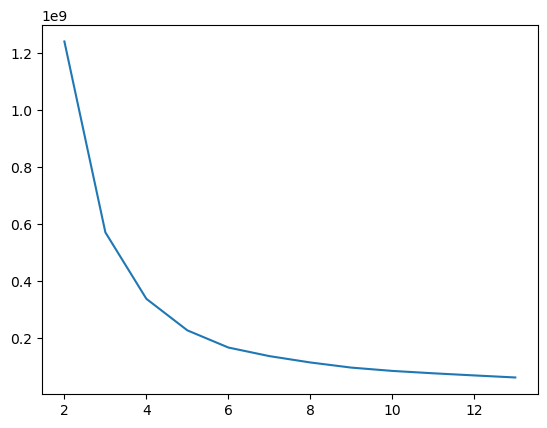

In [45]:
plt.plot(range(2,14),wcss)

In [46]:
import seaborn as sns

<Axes: >

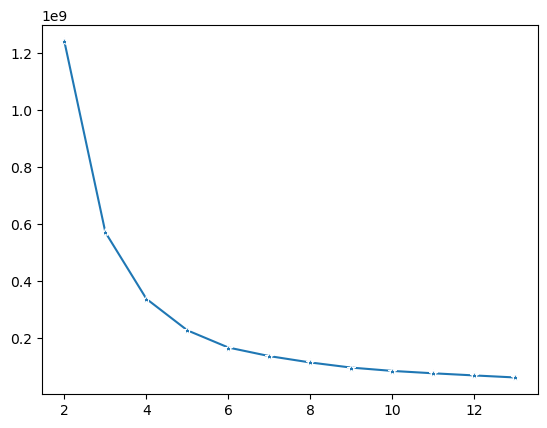

In [47]:
sns.lineplot(x=range(2,14),y=wcss,marker='*')

In [48]:
from yellowbrick.cluster import KElbowVisualizer

In [49]:
model=KMeans(6)

In [50]:
model.fit(x)

KMeans(n_clusters=6)

In [51]:
model=model.fit(x)

In [52]:
tahmin=model.predict(x)

In [53]:
tahmin

array([1, 3, 3, ..., 2, 2, 2], dtype=int32)

In [54]:
x['cluster']=tahmin

In [55]:
x.head()

,Customers.id,Customers.customer_type,Products.price,cluster
0,797,0.0,57.64,1
1,3,0.0,10.29,3
2,3,0.0,68.78,3
3,4,0.0,19.56,3
4,5,0.0,36.05,3


In [56]:
silhouette_score(x,tahmin)

0.5254703856985976

In [57]:
km = KMeans(random_state=42)

In [58]:
visualizer = KElbowVisualizer(km, k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

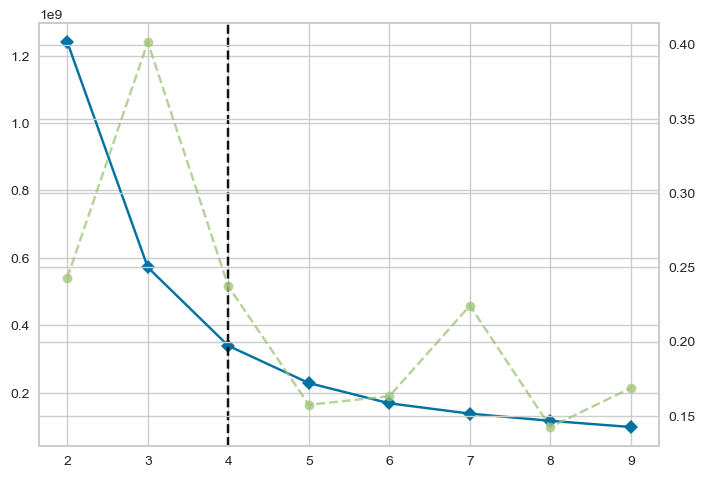

In [59]:
visualizer.fit(x)

In [60]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [62]:
data=linkage(x, method='ward', metric='euclidean')

In [63]:
import matplotlib.pyplot as plt

In [64]:
plt.figure(figsize=(25,6))

<Figure size 2500x600 with 0 Axes>

<Figure size 2500x600 with 0 Axes>

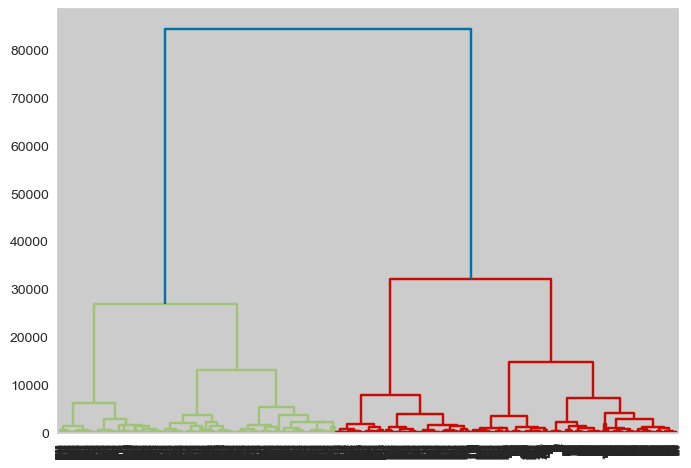

In [65]:
dendrogram(data);

## We create RFM Table

In [66]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

In [67]:
import datetime as dt

In [68]:
import datetime

In [69]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [70]:
# Converting Unix timestamps to datetime object and getting month and day information
df['Customers.create_date'] = pd.to_datetime(df['Customers.create_date'], unit='s').dt.strftime('%Y-%m-%d')

In [71]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,2015-03-10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,2013-12-03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,2013-12-03,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,2013-12-11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,2013-12-12,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [72]:
df2=df[['Customers.id','Customers.create_date','Orders.coupon_amount']]

In [73]:
df2 = pd.DataFrame(df2)

In [74]:
df2['Customers.create_date'] = pd.to_datetime(df2['Customers.create_date'])

In [75]:
now = pd.to_datetime('2024-03-20')

In [76]:
recency = now - df2.groupby('Customers.id')['Customers.create_date'].max()

In [77]:
recency = recency.dt.days

In [78]:
frequency = df2.groupby('Customers.id')['Customers.create_date'].count()

In [79]:
monetary = df2.groupby('Customers.id')['Orders.coupon_amount'].sum()

In [80]:
rfm_df2 = pd.DataFrame
({'Recency': recency})

{'Recency': Customers.id
 3       3760
 4       3752
 5       3751
 7       3736
 8       3723
         ... 
 3730    2865
 3732    2865
 3733    2865
 3735    2865
 3736    2865
 Name: Customers.create_date, Length: 3054, dtype: int64}

In [81]:
rfm_df3 = pd.DataFrame
({'Monetary': monetary})

{'Monetary': Customers.id
 3         0.0
 4         0.0
 5         0.0
 7         0.0
 8         0.0
         ...  
 3730      0.0
 3732      0.0
 3733    109.9
 3735      0.0
 3736      0.0
 Name: Orders.coupon_amount, Length: 3054, dtype: float64}

In [82]:
rfm_df4 = pd.DataFrame
({'Frequency': frequency})

{'Frequency': Customers.id
 3       2
 4       1
 5       3
 7       1
 8       1
        ..
 3730    1
 3732    1
 3733    1
 3735    1
 3736    1
 Name: Customers.create_date, Length: 3054, dtype: int64}

In [83]:
print(rfm_df2)

<class 'pandas.core.frame.DataFrame'>


In [84]:
print(rfm_df3)

<class 'pandas.core.frame.DataFrame'>


In [85]:
print(rfm_df4)

<class 'pandas.core.frame.DataFrame'>
